In [1]:
import pandas as pd

analisis_cancer = pd.read_csv("Data/analisis_cancer.csv")
imagenes_paciente = pd.read_csv("Data/historial_medico_imagenes.csv")
historial_medico = pd.read_csv("Data/historial_medico.csv")

In [2]:
print(analisis_cancer.columns.to_list())
print(imagenes_paciente.columns.to_list())
print(historial_medico.columns.to_list())

['id', 'cancer_stage', 'tumor_size', 'early_detection', 'inflammatory_bowel_disease', 'relapse']
['id', 'image_name']
['id', 'sex', 'age', 'family_history', 'smoke', 'alcohol', 'obesity', 'diet', 'screening_history', 'healthcare_access', 'survival_prediction']


In [3]:
print(analisis_cancer.isna().sum())
print(imagenes_paciente.isna().sum())
print(historial_medico.isna().sum())

id                            0
cancer_stage                  0
tumor_size                    0
early_detection               0
inflammatory_bowel_disease    0
relapse                       0
dtype: int64
id            0
image_name    0
dtype: int64
id                     0
sex                    0
age                    0
family_history         0
smoke                  0
alcohol                0
obesity                0
diet                   0
screening_history      0
healthcare_access      0
survival_prediction    0
dtype: int64


In [4]:
df_merged = pd.merge(historial_medico, analisis_cancer, on='id', how='inner')
df_merged = pd.merge(df_merged, imagenes_paciente, on='id', how='inner')

df_merged.to_csv("data/merged.csv",index=False)

In [5]:
df_merged.head()

,id,sex,age,family_history,smoke,alcohol,obesity,diet,screening_history,healthcare_access,survival_prediction,cancer_stage,tumor_size,early_detection,inflammatory_bowel_disease,relapse,image_name
0,1,M,63,No,Yes,Yes,Normal,Moderate,Never,High,Yes,Localized,48,Yes,No,No,colonn1
1,2,M,64,Yes,Yes,No,Normal,Low,Irregular,Moderate,Yes,Localized,33,Yes,No,No,colonn2
2,3,F,50,No,Yes,No,Normal,Moderate,Regular,Moderate,Yes,Localized,34,No,No,No,colonn3
3,4,M,67,Yes,No,No,Normal,Moderate,Regular,Low,Yes,Localized,34,No,No,No,colonn4
4,5,M,81,No,Yes,No,Overweight,Moderate,Never,High,Yes,Localized,31,Yes,No,No,colonn5


In [8]:
df_merged.describe()

,id,Age,tumor_size
count,10000.00000,10000.000000,10000.00000
mean,5000.50000,69.069600,41.82660
std,2886.89568,11.880601,21.52126
min,1.00000,30.000000,5.00000
25%,2500.75000,59.000000,23.00000
50%,5000.50000,69.000000,42.00000
75%,7500.25000,79.000000,60.00000
max,10000.00000,89.000000,79.00000


In [9]:
df_merged.dtypes

id                             int64
Sexo                          object
Age                            int64
Family history                object
smoke                         object
alcohol                       object
obesity                       object
diet                          object
Screening_History             object
Healthcare_Access             object
Survival_Prediction           object
cancer_stage                  object
tumor_size                     int64
early_detection               object
inflammatory_bowel_disease    object
relapse                       object
Imagename                     object
dtype: object

In [7]:
df_merged_dummies = pd.get_dummies(df_merged, columns=['cancer_stage', 'obesity', 'diet', 'screening_history', 'healthcare_access'], drop_first=True, dtype=int)

# Reemplazamos 'Yes' y 'No' por 1 y 0 en todo el DataFrame
df_merged_dummies = df_merged_dummies.replace({'Yes': 1, 'No': 0})
df_merged_dummies = df_merged_dummies.replace({'M': 1, 'F': 0})
df_merged_dummies = df_merged_dummies.replace({'True': 1, 'False': 0})

df_merged_dummies.head()

df_merged_dummies.to_csv("data/merged_dummies.csv",index=False)

C:\Users\joant\AppData\Local\Temp\ipykernel_13976\34904671.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merged_dummies = df_merged_dummies.replace({'Yes': 1, 'No': 0})
C:\Users\joant\AppData\Local\Temp\ipykernel_13976\34904671.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merged_dummies = df_merged_dummies.replace({'M': 1, 'F': 0})


## VISUALIZAR LA MATRIZ DE CORRELACIÓN

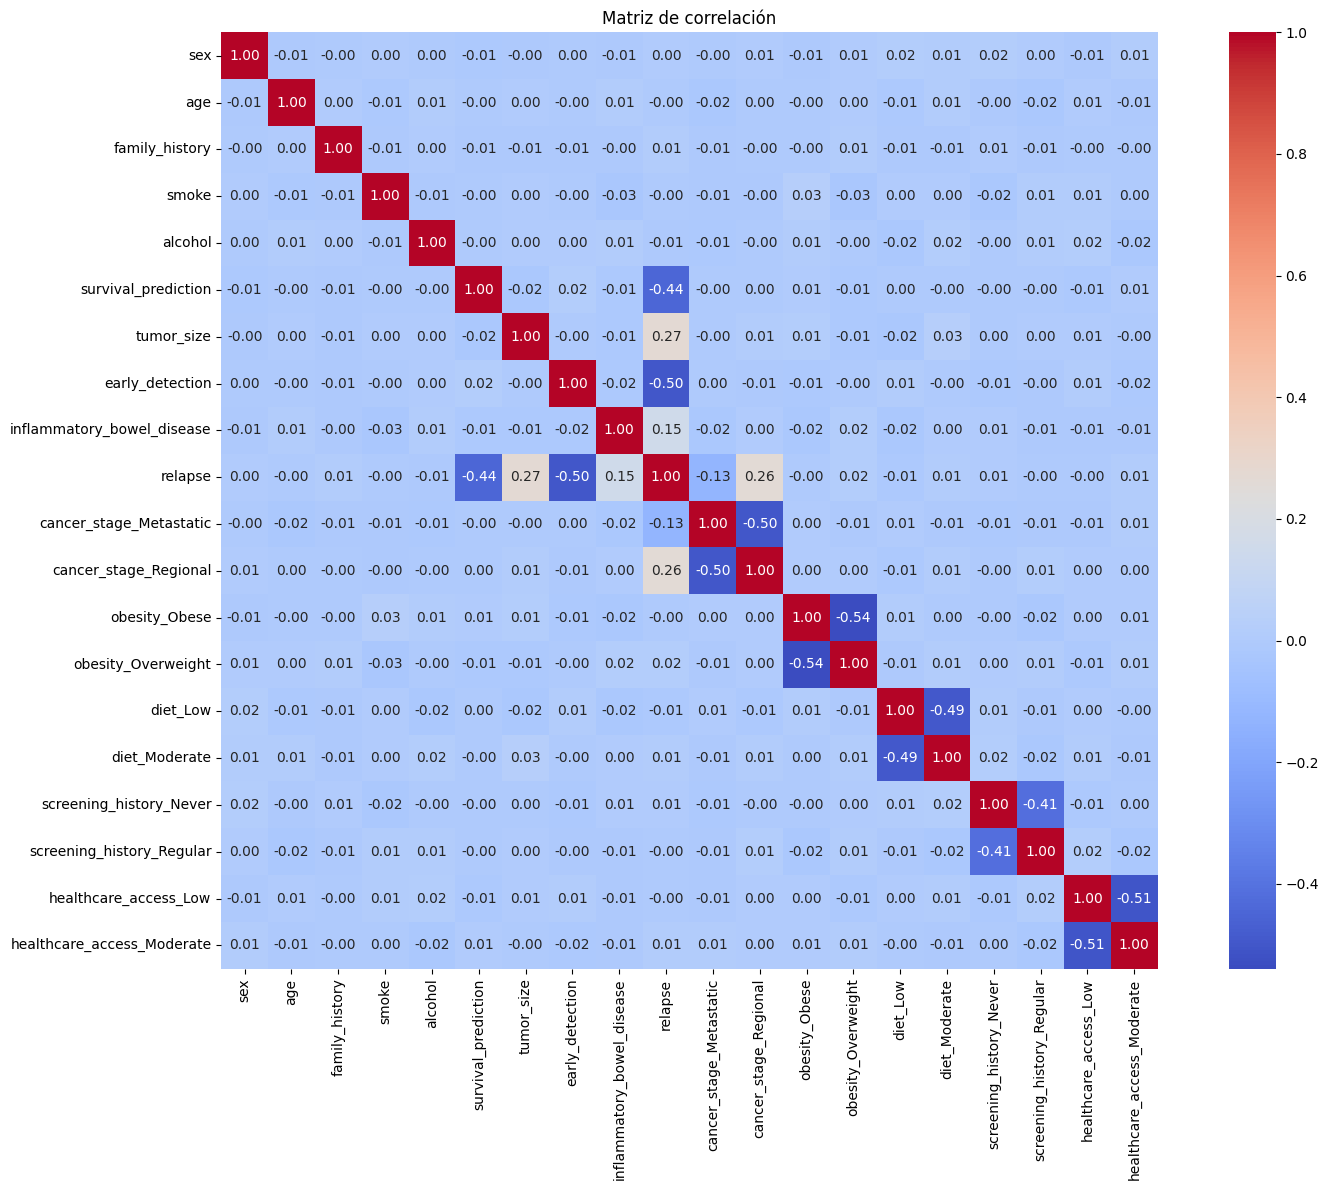

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

df_sin_id = df_merged_dummies.drop(columns=['id'])

# Calculamos la matriz de correlación
correlation_matrix = df_sin_id.corr(numeric_only=True)

# Creamos la visualización
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Matriz de correlación')
plt.tight_layout()
plt.show()


In [12]:
import pandas as pd

# Cargar el CSV limpio
df = pd.read_csv("data/merged_dummies.csv")  # (usamos / por compatibilidad)

# Calcular correlación con la variable objetivo 'survival_prediction'
correlaciones = df.corr(numeric_only=True)['survival_prediction'].drop('survival_prediction')

# Ordenar por correlación absoluta descendente
correlaciones_ordenadas = correlaciones.abs().sort_values(ascending=False)

# Ver top 15 más correlacionadas
top_variables = correlaciones_ordenadas.head(6).index.tolist()
print("Top variables más correlacionadas con 'survival_prediction':")
print(top_variables)



Top variables más correlacionadas con 'survival_prediction':
['id', 'relapse', 'tumor_size', 'early_detection', 'sex', 'inflammatory_bowel_disease']
